In [8]:
import tensorflow as tf
sess = tf.Session()
first_var = tf.Variable(tf.zeros([2,3]))
second_var = tf.Variable(tf.zeros_like(first_var))
print(sess.run(second_var.initializer))

None


In [11]:
sess = tf.InteractiveSession()
a= tf.truncated_normal([2,3])

In [12]:
a.eval()

array([[ 1.5332793 ,  0.52375954, -1.2653173 ],
       [-0.48726085, -1.7660573 ,  1.333635  ]], dtype=float32)

In [15]:
g=tf.Graph()
print(g.as_graph_def())

versions {
  producer: 27
}



In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
DATA_TYPE = 'blobs'

if (DATA_TYPE == 'circle'):
    K=2
else:
    K=4
MAX_ITERS = 1000
start = time.time()
centers = [(-2, -2), (-2, 1.5), (1.5, -2), (2, 1.5)]
if (DATA_TYPE == 'circle'):
    data, features = make_circles(n_samples=200, shuffle=True, noise= 0.01,factor=0.4)
else:
    data, features = make_blobs (n_samples=200, centers=centers, n_features = 2,cluster_std=0.8, shuffle=False, random_state=42)

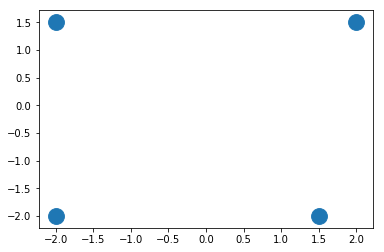

[]

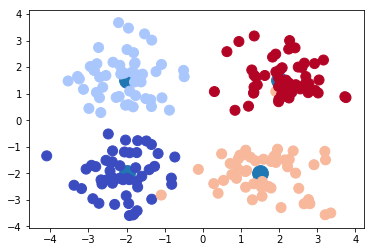

In [3]:
fig, ax = plt.subplots()
ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
plt.show()

fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
    ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
    ax.scatter(data.transpose()[0], data.transpose()[1], marker = 'o', s = 100, c =features, cmap=plt.cm.coolwarm )
plt.plot()

In [10]:
N = 200
points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))
centroids = tf.Variable(tf.slice(points.initialized_value(), [0,0], [K,2]))
sess = tf.Session()
sess.run(tf.initialize_all_variables())
rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 2])
rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 2])
sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids),reduction_indices=2)
best_centroids = tf.argmin(sum_squares, 1)
did_assignments_change = tf.reduce_any(tf.not_equal(best_centroids,cluster_assignments))
def bucket_mean(data, bucket_ids, num_buckets):
    total = tf.unsorted_segment_sum(data, bucket_ids, num_buckets)
    count = tf.unsorted_segment_sum(tf.ones_like(data), bucket_ids, num_buckets)
    return total/count
means = bucket_mean(points, best_centroids, K)
with tf.control_dependencies([did_assignments_change]):
    do_updates = tf.group(centroids.assign(means),cluster_assignments.assign(best_centroids))

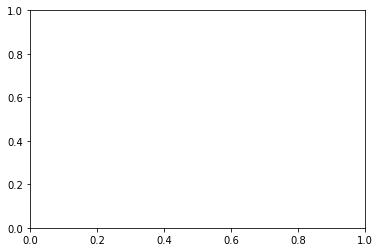

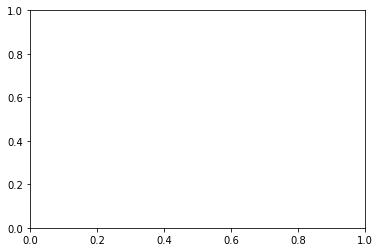

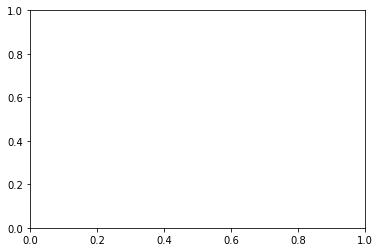

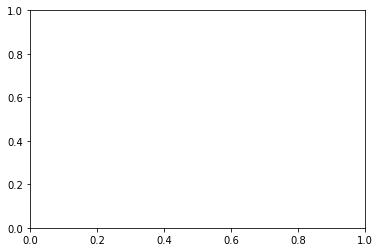

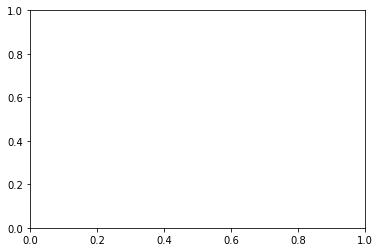

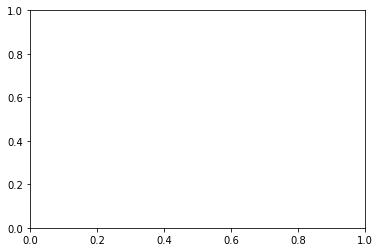

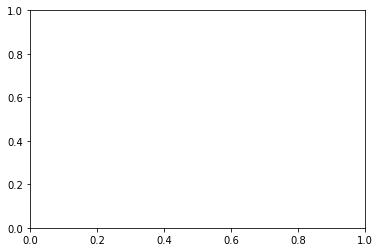

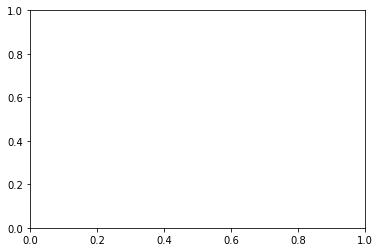

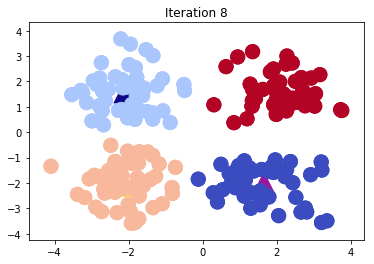

Found in 1171.49 seconds 8 iterations
Centroids:
[[ 1.65289262 -2.04643427]
 [-2.0763623   1.61204964]
 [-2.08862822 -2.07255306]
 [ 2.09831502  1.55936014]]
Cluster assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [12]:
changed = True
iters = 0
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
    colourindexes=[2,1,4,3]
else:
    colourindexes=[2,1]
while changed and iters < MAX_ITERS:
    fig, ax = plt.subplots()
    iters += 1
    [changed, _] = sess.run([did_assignments_change, do_updates])
    [centers, assignments] = sess.run([centroids, cluster_assignments])
ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1],marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
ax.scatter(centers[:,0],centers[:,1], marker = '^', s = 550, c = colourindexes,cmap=plt.cm.plasma)
ax.set_title('Iteration ' + str(iters))
plt.savefig("kmeans" + str(iters) +".png")
ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1],marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
plt.show()
end = time.time()
print (("Found in %.2f seconds" % (end-start)), iters, "iterations")
print("Centroids:")
print (centers)
print ("Cluster assignments:", assignments)

AttributeError: module 'tensorflow' has no attribute 'scalar_summary'

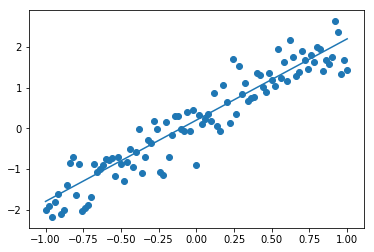

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.4 + 0.2 # create a y value
plt.scatter(trX,trY)
plt.plot (trX, .2 + 2 * trX)
X = tf.placeholder("float", name="X") # create symbolic variables
Y = tf.placeholder("float", name = "Y")
with tf.name_scope("Model"):
    def model(X, w, b):
        return tf.math.multiply(X, w) + b # We just define the line as X*w + b0
    w = tf.Variable(-1.0, name="b0") # create a shared variable
    b = tf.Variable(-2.0, name="b1") # create a shared variable
    y_model = model(X, w, b)
with tf.name_scope("CostFunction"):
    cost = (tf.pow(Y-y_model, 2)) # use sqr error for cost function
    train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
sess = tf.Session()
init = tf.initialize_all_variables()
tf.train.write_graph(sess.graph, '/home/caitlyn/Documents','graph.pbtxt')
cost_op = tf.scalar_summary("loss", cost)
merged = tf.merge_all_summaries()
sess.run(init)
writer = tf.train.SummaryWriter('/home/caitlyn/Documents', sess.graph)
for i in range(100):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})
        summary_str = sess.run(cost_op, feed_dict={X: x, Y: y})
        writer.add_summary(summary_str, i)
        b0temp=b.eval(session=sess)
        b1temp=w.eval(session=sess)
plt.plot (trX, b0temp + b1temp * trX )
printsess.run(w) # Should be around 2
printsess.run(b) #Should be around 0.2
plt.scatter(trX,trY)
plt.plot (trX, sess.run(b) + trX * sess.run(w))

In [17]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tfe.enable_eager_execution()

x = [[2.]]
m = tf.matmul(x, x)

ValueError: tf.enable_eager_execution must be called at program startup.

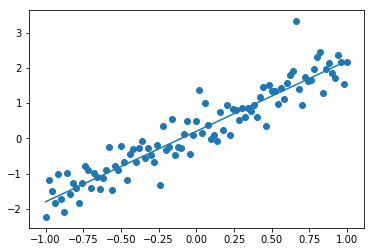

In [18]:
%matplotlib inline
import tensorflow as tf
import numpy as np
trX = np.linspace(-1,1,101)
trY = 2*trX + np.random.randn(*trX.shape)*0.4 + 0.2
import matplotlib.pyplot as plt
plt.scatter(trX,trY)
plt.plot(trX, 0.2+2*trX)

In [19]:
X = tf.placeholder('float',name = 'X')
Y = tf.placeholder('float',name = 'Y')
with tf.name_scope("Model"):
    def model(X,w,b):
        return tf.multiply(X,w) +b
    w = tf.Variable(-1.0,name = 'b0')
    b = tf.Variable(-2.0,name = 'b1')
    y_model = model(X,w,b)

In [31]:
with tf.name_scope("CoseFunction"):
    cost = (tf.pow(Y-y_model,2))
learning_rate = 0.05
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
init = tf.initialize_all_variables()
tf.train.write_graph(sess.graph,'/home/caitlyn/Documents','graph.pbtxt')
cost_op = tf.summary.scalar("loss", cost)
merged = tf.summary.merge_all()
sess.run(init)
writer = tf.summary.FileWriter('/home/caitlyn/Documents', sess.graph)
for i in range(100):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})
        summary_str = sess.run(cost_op, feed_dict={X: x, Y: y})
        writer.add_summary(summary_str, i)
        b0temp=b.eval(session=sess)
        b1temp=w.eval(session=sess)

TypeError: 'zip' object is not subscriptable